In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
print('modules imported')

modules imported


## Dataset

In [2]:
train=pd.read_csv(r'linear reg/wk3_kc_house_train_data.csv')
valid=pd.read_csv(r'linear reg/wk3_kc_house_valid_data.csv')
test=pd.read_csv(r'linear reg/wk3_kc_house_test_data.csv')
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [3]:
print("Train, valid and test sizes are")
print(train.shape,valid.shape,test.shape)

Train, valid and test sizes are
(9761, 21) (9635, 21) (2217, 21)


In [4]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [5]:
train.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
train['date'].isnull().values.any()

False

In [7]:
train=train.drop(['id','date'],axis=1)
test=test.drop(['id','date'],axis=1)
valid=valid.drop(['id','date'],axis=1)

In [8]:
xtrain=train.iloc[:,1:]
ytrain=train.loc[:,'price']

xvalid=valid.iloc[:,1:]
yvalid=valid.loc[:,'price']

xtest=test.iloc[:,1:]
ytest=test.loc[:,'price']

xtrain.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


# Linear Regression Model

In [9]:
clf_linear= linear_model.LinearRegression()
clf_linear.fit(xtrain,ytrain)
print('Coefficients are')
print(clf_linear.coef_)

Coefficients are
[-3.36060099e+04  4.47514550e+04  1.15326927e+02  1.57341500e-01
  4.26837286e+03  6.13503557e+05  5.15290304e+04  2.49726794e+04
  9.75375728e+04  7.84718735e+01  3.68550542e+01 -2.81599991e+03
  1.32665896e+01 -5.97639901e+02  5.95138240e+05 -2.23730664e+05
  1.08693821e+01 -3.47340148e-01]


In [10]:
yhat=clf_linear.predict(xtest)

In [69]:
from sklearn.metrics import mean_squared_error as mse
rmse_lin=mse(ytest,yhat,squared=False)
print('RMSE score of a linear fit is', rmse_lin)

print('R squred score of a linear fit is', clf_linear.score(xtest,ytest))

RMSE score of a linear fit is 200259.74634917808
R squred score of a linear fit is 0.6876846633883941


# Polynomial Regression Model

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Degree=2

In [13]:
model2=Pipeline([('poly',PolynomialFeatures(degree=2)),('linear', linear_model.LinearRegression(fit_intercept=False))])
model2=model2.fit(xtrain,ytrain)

In [70]:
yhat2=model2.predict(xtest)
rmse_poly=mse(ytest,yhat2,squared=False)
print('RMSE score of a polynomial fit of degree 2 is', rmse_poly)

print('R squred score of a polynomial fit of degree 2 is', model2.score(xtest,ytest))

RMSE score of a polynomial fit of degree 2 is 164355.6822321383
R squred score of a polynomial fit of degree 2 is 0.78963405544254


### Degree=3

In [15]:
model3=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression(fit_intercept=False))])
model3=model3.fit(xtrain,ytrain)

In [16]:
yhat3=model3.predict(xtest)
rmse=mse(ytest,yhat3,squared=False)
print('RMSE score of a polynomial fit of degree 3 is', rmse)

print('R squred score of a polynomial fit of degree 3 is', model3.score(xtest,ytest))

RMSE score of a polynomial fit of degree 3 is 879263.215660285
R squred score of a polynomial fit of degree 3 is -5.020655768539865


### Degree=4

In [17]:
model4=Pipeline([('poly',PolynomialFeatures(degree=4)),('linear', linear_model.LinearRegression(fit_intercept=False))])
model4=model4.fit(xtrain,ytrain)

In [18]:
yhat4=model4.predict(xtest)
rmse=mse(ytest,yhat4,squared=False)
print('RMSE score of a polynomial fit of degree 4 is', rmse)

print('R squred score of a polynomial fit of degree 4 is', model4.score(xtest,ytest))

RMSE score of a polynomial fit of degree 4 is 34487191.630132176
R squred score of a polynomial fit of degree 4 is -9261.35981977783


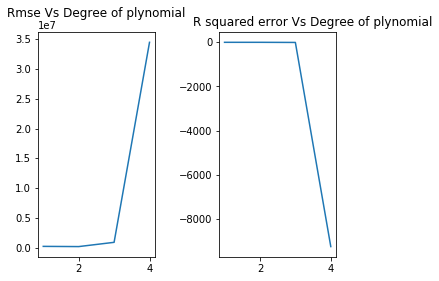

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

degrees=[1,2,3,4]
Rmse=[200259.74634917808,164355.6822321383,879263.215660285,34487191.630132176]
Rsq=[clf_linear.score(xtest,ytest),model2.score(xtest,ytest),model3.score(xtest,ytest),model4.score(xtest,ytest)]

fig,(axs1,axs2)= plt.subplots(1,2)
axs1.plot(degrees,Rmse)
axs1.set_title('Rmse Vs Degree of plynomial',y=1.04)
axs2.plot(degrees,Rsq)
axs2.set_title('R squared error Vs Degree of plynomial',x=0.8)
plt.tight_layout()
#plt.figure(figsize=(10,40))
plt.show()

# Ridge Regression Model

In [20]:
poly=PolynomialFeatures(degree=2)
rtrain=poly.fit_transform(xtrain)
rtest=poly.fit_transform(xtest)
rvalid=poly.fit_transform(xvalid)


In [21]:
ridge_model=linear_model.Ridge(alpha=1.5e-5)
ridge_model.fit(rtrain,ytrain)

Ridge(alpha=1.5e-05)

In [22]:
yhat_r=ridge_model.predict(rtest)
rmse_r=mse(ytest,yhat_r,squared=False)
print('RMSE score of a ridge model fit of polynomial degree 2 is', rmse_r)

print('R squred score of a ridge model fit of polynomial degree 2 is', ridge_model.score(rtest,ytest))

RMSE score of a ridge model fit of polynomial degree 2 is 164323.02504027713
R squred score of a ridge model fit of polynomial degree 2 is 0.7897176458410519


### Trying for different L2 penalty values on validation set

In [23]:
def ridgefit(alph,xtr,ytr,xval,yval):
    ridge_model=linear_model.Ridge(alpha=alph)
    ridge_model.fit(xtr,ytr)
    
    yhat_r=ridge_model.predict(xval)
    rmse_r=mse(yval,yhat_r,squared=False)
    print('RMSE score of a ridge model fit of polynomial degree 2 with alpha',alph,'is', rmse_r)
    print('R squred score of a ridge model fit of polynomial degree 2 with alpha',alph,'is', ridge_model.score(xval,yval))
    print('')
    return rmse_r

In [24]:
l2=[1.5e-5,1.5e-4,1.5e-3,1.5e-2,1.5e-1,1.5,1.5e1,1.23e2,1e3]
rmse_r=[]
for alp in l2:
    tmp1=ridgefit(alp,rtrain,ytrain,rvalid,yvalid)
    rmse_r=np.append(rmse_r,tmp1)

RMSE score of a ridge model fit of polynomial degree 2 with alpha 1.5e-05 is 158422.61750191648
R squred score of a ridge model fit of polynomial degree 2 with alpha 1.5e-05 is 0.80215721599186

RMSE score of a ridge model fit of polynomial degree 2 with alpha 0.00015 is 158496.48476521825
R squred score of a ridge model fit of polynomial degree 2 with alpha 0.00015 is 0.8019726777953856

RMSE score of a ridge model fit of polynomial degree 2 with alpha 0.0015 is 158626.1389230951
R squred score of a ridge model fit of polynomial degree 2 with alpha 0.0015 is 0.8016485625045808

RMSE score of a ridge model fit of polynomial degree 2 with alpha 0.015 is 158706.63160461717
R squred score of a ridge model fit of polynomial degree 2 with alpha 0.015 is 0.8014472099403644

RMSE score of a ridge model fit of polynomial degree 2 with alpha 0.15 is 158918.2831632727
R squred score of a ridge model fit of polynomial degree 2 with alpha 0.15 is 0.800917275825743

RMSE score of a ridge model fit 

In [25]:
model=0
min_ridge=1e12
for i in range(len(rmse_r)):
    if rmse_r[i]<min_ridge:
        min_ridge=rmse_r[i]
        model=i
print("Minimum rmse is",min_ridge,"from model",model)

Minimum rmse is 158422.61750191648 from model 0


In [26]:
ridge_rmse=ridgefit(1.5e-5,rtrain,ytrain,rtest,ytest)

RMSE score of a ridge model fit of polynomial degree 2 with alpha 1.5e-05 is 164323.02504027713
R squred score of a ridge model fit of polynomial degree 2 with alpha 1.5e-05 is 0.7897176458410519



# Lasso Regression

In [27]:
lasso_model=linear_model.Lasso(alpha=1.5e-5,tol=0.05,max_iter=10000,normalize=True)
lasso_model.fit(rtrain,ytrain)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134987619144360.33, tolerance: 70292119468586.164
  positive)


Lasso(alpha=1.5e-05, max_iter=10000, normalize=True, tol=0.05)

In [28]:
yhat_l=lasso_model.predict(rtest)
rmse_l=mse(ytest,yhat_l,squared=False)
print('RMSE score of a lasso model fit of polynomial degree 2 is', rmse_l)

print('R squred score of a lasso model fit of polynomial degree 2 is', lasso_model.score(rtest,ytest))

RMSE score of a lasso model fit of polynomial degree 2 is 182482.68426487537
R squred score of a lasso model fit of polynomial degree 2 is 0.740672060645803


### Trying for different L2 penalty values on validation set

In [29]:
def lassofit(alph,xtr,ytr,xval,yval):
    lasso_model=linear_model.Lasso(alpha=alph,tol=0.05,max_iter=100000,normalize=True)
    lasso_model.fit(xtr,ytr)
    
    yhat_l=lasso_model.predict(xval)
    rmse_l=mse(yval,yhat_l,squared=False)
    print('RMSE score of a lasso model fit of polynomial degree 2 with alpha',alph,'is', rmse_l)
    print('R squred score of a lasso model fit of polynomial degree 2 with alpha',alph,'is', lasso_model.score(xval,yval))
    print('')
    return rmse_l

In [30]:
l2_l=[1.5e-5,1.5e-4,1.5e-3,1.5e-2,1.5e-1,1.5,1.5e1,1.23e2,1e3]
rmse_l=[]
for alp in l2_l:
    tmp2=lassofit(alp,rtrain,ytrain,rvalid,yvalid)
    rmse_l=np.append(rmse_l,tmp2)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127202098906961.7, tolerance: 70292119468586.164
  positive)


RMSE score of a lasso model fit of polynomial degree 2 with alpha 1.5e-05 is 168011.31169559728
R squred score of a lasso model fit of polynomial degree 2 with alpha 1.5e-05 is 0.7774831565688866



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127143481695422.88, tolerance: 70292119468586.164
  positive)


RMSE score of a lasso model fit of polynomial degree 2 with alpha 0.00015 is 168011.13854877435
R squred score of a lasso model fit of polynomial degree 2 with alpha 0.00015 is 0.777483615205442



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126556890101552.38, tolerance: 70292119468586.164
  positive)


RMSE score of a lasso model fit of polynomial degree 2 with alpha 0.0015 is 168009.75093054087
R squred score of a lasso model fit of polynomial degree 2 with alpha 0.0015 is 0.7774872907536275



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120620079875576.33, tolerance: 70292119468586.164
  positive)


RMSE score of a lasso model fit of polynomial degree 2 with alpha 0.015 is 168010.41505087554
R squred score of a lasso model fit of polynomial degree 2 with alpha 0.015 is 0.7774855316235034

RMSE score of a lasso model fit of polynomial degree 2 with alpha 0.15 is 171663.39428181446
R squred score of a lasso model fit of polynomial degree 2 with alpha 0.15 is 0.7677042647057817

RMSE score of a lasso model fit of polynomial degree 2 with alpha 1.5 is 176300.06144221264
R squred score of a lasso model fit of polynomial degree 2 with alpha 1.5 is 0.7549860719615266

RMSE score of a lasso model fit of polynomial degree 2 with alpha 15.0 is 182125.5352816644
R squred score of a lasso model fit of polynomial degree 2 with alpha 15.0 is 0.7385265916458377

RMSE score of a lasso model fit of polynomial degree 2 with alpha 123.0 is 189588.43213473284
R squred score of a lasso model fit of polynomial degree 2 with alpha 123.0 is 0.7166589390846747

RMSE score of a lasso model fit of polynomia

In [31]:
model=0
min_lasso=1e12
for i in range(len(rmse_l)):
    if rmse_l[i]<min_lasso:
        min_lasso=rmse_l[i]
        model=i
print("Minimum rmse is",min_lasso,"from model",model)

Minimum rmse is 168009.75093054087 from model 2


In [32]:
lasso_rmse=lassofit(0.0015,rtrain,ytrain,rtest,ytest)

RMSE score of a lasso model fit of polynomial degree 2 with alpha 0.0015 is 177397.29964398633
R squred score of a lasso model fit of polynomial degree 2 with alpha 0.0015 is 0.7549244436789568



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126556890101552.38, tolerance: 70292119468586.164
  positive)


# Elastic net 

In [33]:
from sklearn.linear_model import ElasticNet
elastic_model=ElasticNet(alpha=0.015,tol=0.05,max_iter=10000)
elastic_model.fit(rtrain,ytrain)


/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135553504215275.8, tolerance: 70292119468586.164
  positive)


ElasticNet(alpha=0.015, max_iter=10000, tol=0.05)

In [34]:
yhat_e=elastic_model.predict(rtest)
rmse_e=mse(ytest,yhat_e,squared=False)
print('RMSE score of a elastic net model fit of degree 2 is', rmse_e)

print('R squred score of a elastic model fit of degree 2 is', elastic_model.score(rtest,ytest))

RMSE score of a elastic net model fit of degree 2 is 182254.75894790716
R squred score of a elastic model fit of degree 2 is 0.7413194699024257


### Trying for different L2 penalty values on validation set

In [35]:
def elasticfit(alph,xtr,ytr,xval,yval):
    elastic_model=ElasticNet(alpha=alph,tol=0.05,max_iter=10000)
    elastic_model.fit(xtr,ytr)
    
    yhat_e=elastic_model.predict(xval)
    rmse_e=mse(yval,yhat_e,squared=False)
    print('RMSE score of a elastic model fit of polynomial degree 2 with alpha',alph,'is', rmse_e)
    print('R squred score of a elastic model fit of polynomial degree 2 with alpha',alph,'is', elastic_model.score(xval,yval))
    print('')
    return rmse_e

In [36]:
l2_e=[1.5e-5,1.5e-4,1.5e-3,1.5e-2,1.5e-1,0.8,1.5,1.5e1,1.23e2,1e3]
rmse_e=[]
for alp in l2_e:
    tmp3=elasticfit(alp,rtrain,ytrain,rvalid,yvalid)
    rmse_e=np.append(rmse_e,tmp3)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134977490779990.84, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 1.5e-05 is 173452.85017160597
R squred score of a elastic model fit of polynomial degree 2 with alpha 1.5e-05 is 0.7628360217412538



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134979486370204.48, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.00015 is 173431.63807343118
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.00015 is 0.7628940252617779



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135101389945110.77, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.0015 is 173415.42506131434
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.0015 is 0.7629383542250421



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135553504215275.8, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.015 is 173411.2662182283
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.015 is 0.7629497244980636



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136400514314901.98, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.15 is 173553.1605853995
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.15 is 0.762561631371349



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137024018500745.28, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.8 is 173659.75714112996
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.8 is 0.7622698719477917



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137202513680821.86, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 1.5 is 173703.6135072145
R squred score of a elastic model fit of polynomial degree 2 with alpha 1.5 is 0.7621497831466185



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137676605473990.27, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 15.0 is 173807.4335157265
R squred score of a elastic model fit of polynomial degree 2 with alpha 15.0 is 0.7618653792641934



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137928299774903.55, tolerance: 70292119468586.164
  positive)


RMSE score of a elastic model fit of polynomial degree 2 with alpha 123.0 is 173850.9296371457
R squred score of a elastic model fit of polynomial degree 2 with alpha 123.0 is 0.7617461757499528

RMSE score of a elastic model fit of polynomial degree 2 with alpha 1000.0 is 173921.53679274788
R squred score of a elastic model fit of polynomial degree 2 with alpha 1000.0 is 0.7615526094460557



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138320778446933.19, tolerance: 70292119468586.164
  positive)


In [37]:
model=0
min_elastic=1e12
for i in range(len(rmse_e)):
    if rmse_e[i]<min_elastic:
        min_elastic=rmse_e[i]
        model=i
print("Minimum rmse is",min_elastic,"from model",model)

Minimum rmse is 173411.2662182283 from model 3


In [38]:
elastic_rmse=elasticfit(0.015,rtrain,ytrain,rtest,ytest)

RMSE score of a elastic model fit of polynomial degree 2 with alpha 0.015 is 182254.75894790716
R squred score of a elastic model fit of polynomial degree 2 with alpha 0.015 is 0.7413194699024257



/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135553504215275.8, tolerance: 70292119468586.164
  positive)


# KNN Regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(xtrain,ytrain)


KNeighborsRegressor(n_neighbors=2)

In [91]:
yhat_k=knr.predict(xtest)
rmse_k=mse(ytest,yhat_k,squared=False)
print('RMSE score of a K Neighbors regressor fit having 2 neighbours is', rmse_k)

print('R squred score of a K Neighbors regressor having 2 neighbours is', knr.score(xtest,ytest))

RMSE score of a K Neighbors regressor fit having 2 neighbours is 271969.9640394712
R squred score of a K Neighbors regressor having 2 neighbours is 0.423966321806034


### Trying for different number of neighbours on validation set

In [41]:
def knrfit(nei,xtr,ytr,xval,yval):
    knr_model=KNeighborsRegressor(n_neighbors=nei)
    knr_model.fit(xtr,ytr)
    
    yhat_k=knr_model.predict(xval)
    rmse_k=mse(yval,yhat_k,squared=False)
    print('RMSE score of a K Neighbors regressor fit having',nei,'neighbors is', rmse_k)
    print('R squred score of a K Neighbors regressor fit having',nei,'neighbors is', knr_model.score(xval,yval))
    print('')
    return rmse_k

In [42]:
n_k=[1,2,3,4,5,6,10,20,50,100,200,1000]
rmse_k=[]
for alp in n_k:
    tmp4=knrfit(alp,rtrain,ytrain,rvalid,yvalid)
    rmse_k=np.append(rmse_k,tmp4)

RMSE score of a K Neighbors regressor fit having 1 neighbors is 304990.8237404895
R squred score of a K Neighbors regressor fit having 1 neighbors is 0.26673764133543176

RMSE score of a K Neighbors regressor fit having 2 neighbors is 272352.83648557053
R squred score of a K Neighbors regressor fit having 2 neighbors is 0.4152777082869238

RMSE score of a K Neighbors regressor fit having 3 neighbors is 263180.08462804504
R squred score of a K Neighbors regressor fit having 3 neighbors is 0.4540009461859412

RMSE score of a K Neighbors regressor fit having 4 neighbors is 257302.50714015367
R squred score of a K Neighbors regressor fit having 4 neighbors is 0.4781161211690498

RMSE score of a K Neighbors regressor fit having 5 neighbors is 254925.43052089986
R squred score of a K Neighbors regressor fit having 5 neighbors is 0.48771437625821434

RMSE score of a K Neighbors regressor fit having 6 neighbors is 254923.0433705063
R squred score of a K Neighbors regressor fit having 6 neighbo

In [44]:
model=0
min_knr=1e12
for i in range(len(rmse_e)):
    if rmse_k[i]<min_knr:
        min_knr=rmse_k[i]
        model=i
print("Minimum rmse is",min_knr,"from model",model)

Minimum rmse is 254923.0433705063 from model 5


In [89]:
knr_rmse=knrfit(6,rtrain,ytrain,rtest,ytest)

RMSE score of a K Neighbors regressor fit having 6 neighbors is 244208.97576934652
R squred score of a K Neighbors regressor fit having 6 neighbors is 0.5355604109385981



# Decision Tree Model

In [90]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [92]:
yhat_d=dtr.predict(xtest)
rmse_d=mse(ytest,yhat_d,squared=False)
print('RMSE score of a Decision Tree regressor fit is', rmse_d)

print('R squred score of a Decision Tree regressor fit is', dtr.score(xtest,ytest))

RMSE score of a Decision Tree regressor fit is 189435.89037660518
R squred score of a Decision Tree regressor fit is 0.7205330115893525


# Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [94]:
yhat_rf=dtr.predict(xtest)
rmse_rf=mse(ytest,yhat_rf,squared=False)
print('RMSE score of a Random Forest regressor fit is', rmse_rf)

print('R squred score of a Random Forest regressor fit is', rfr.score(xtest,ytest))

RMSE score of a Random Forest regressor fit is 189435.89037660518
R squred score of a Random Forest regressor fit is 0.8777013190101608


# Comparision

In [96]:
models=['linear','polynomial degree 2','ridge','lasso','elastic','knn','Decision Tree', 'Random Forest']
rmses=[rmse_lin,rmse_poly,ridge_rmse,lasso_rmse,elastic_rmse,knr_rmse,rmse_d,rmse_rf]

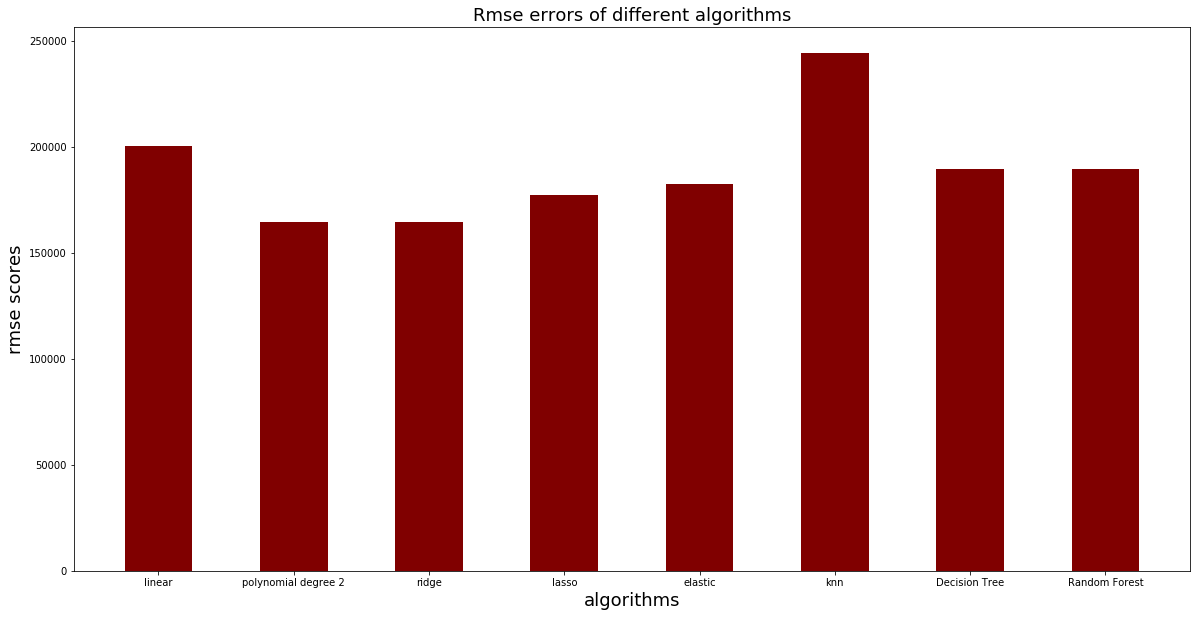

In [97]:
rmse_fig=plt.figure(figsize=(20,10))
plt.bar(models,rmses,color='maroon',width=0.5)
plt.title('Rmse errors of different algorithms',fontsize=18)
plt.xlabel('algorithms',fontsize=18)
plt.ylabel('rmse scores',fontsize=18)
plt.show()